# Hex Colors.
So while making the solution to HW 3 I went on a bit of a tangent with colors in matplotlib. Rather than making this part of the solution I though I would put it in its own notebook to share with people if they want

In [2]:
%cd '/home/cody/Physics 331/Textbook Programs/Chapter 2'
%ls

/home/cody/Physics 331/Textbook Programs/Chapter 2
 bisect_eq2.py            deriv_eq2.py  'figure 2.1.png'  'figure 2.4.png'
 bisect.py                equation2.py  'Figure 2.2.png'   newton.py
'Chapter 2 Stuff.ipynb'   equation3.py  'figure 2.3.png'   __pycache__/


In [3]:
import numpy as np
import matplotlib.pyplot as plt
def kepler_equation(u,t,e):
    """
    Keplers Equation, 't' needs to be declaired as a global variable outside of the function.
    
    Input
    ----------
    u: Mean anomoly (radians)
    t: Time I want to evaluate things at (day)
    e: Eccentricity (unitless)
    
    """
    T = 3.23263889 #Time of pericenter passage (days)
    P = 365.25 #Period of Earth (days) 
    kepler = u - e*np.sin(u) - 2*np.pi / P * (t - T)
    return kepler

Make a plot similar to the plot I have in HW 3 solutions, but I want a higher ecentricity,

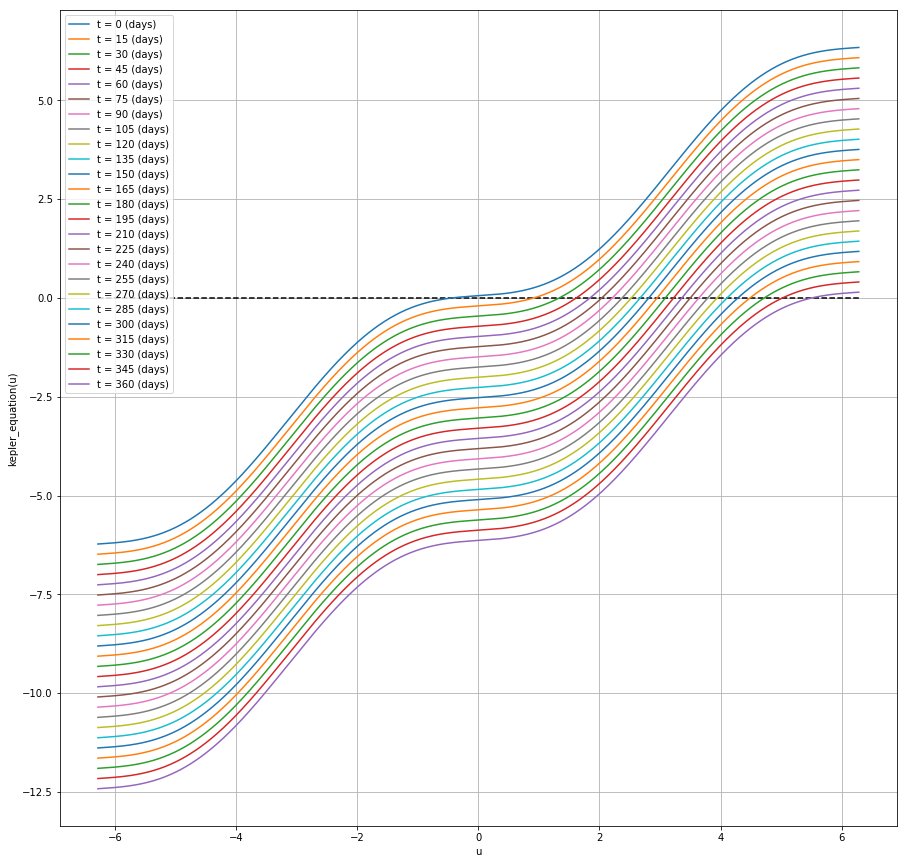

In [4]:
us = np.arange(-2*np.pi,2*np.pi, 0.001) #Range of 'u' that I want to plot over
plt.figure(figsize = (15,15))
plt.grid(which='major', axis='both') #Add grid lines
times = np.arange(0,365,15) #List of times I want to plot keplers equation for
for t in times:
    plt.plot(us, kepler_equation(us,t,0.9), label = 't = {} (days)'.format(t))
plt.legend()
plt.xlabel('u')
plt.ylabel('kepler_equation(u)')
plt.hlines(0,-2*np.pi, 2*np.pi, linestyles='dashed')
plt.show()

This looks a lot cooler, but I don't like it that the colors repeat. This is just bad plotting if you have multiple things with the same lines. Python will change colors on a graph, but it only has so many default colors to cycle through. So lets make some modifications to get different colors each time, to do this lets look at hex colors.

Normaly when you write a number we are using a base 10 system, things go from 0-9 and then you repeat, but moved over one spot. 9,10,11,12...

Odds are you've seen binary before, that's in base 2. You use 0,1 then repeat but move over one spot, so the conversion would be,

    0, 1, 10, 11, 100, 101, 110, 111, 1000,...
    0, 1,  2,  3,   4,   5,   6,   7,    8,...
There is also hexadecimal that is base 16. we go 0-9 like normal, but rather than rolling over to 10, we use letters of the alphabet to keep going up to F, so the conversion would looke like,

    0, 1, 2, 3, 4, 5, 6, 7, 8, 9,  A,  B,  C,  D,  E,  F, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 1A, 1B,...
    0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,...
   

Why do we care? Because colors can be represented as a hexadecimal number (normaly signified with a $#$ before the number). Each color can be represented as a six digit hexadecimal number. For example the default Python blue is

    #1F77B4
    
Each primary color is represented by two of the digits in the number,The first two digits control how much red is in the color. the second two digits say how much green is used, and the last two control how much blue is used. As an example

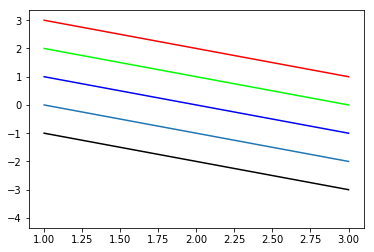

In [5]:
x = np.array([1,2,3])
y = np.array([3,2,1])
plt.plot(x,y  , color = '#FF0000') #Pure Red
plt.plot(x,y-1, color = '#00FF00') #Pure Green
plt.plot(x,y-2, color = '#0000FF') #Pure Blue
plt.plot(x,y-3, color = '#1F77B4') #Python default blue 
plt.plot(x,y-4, color = '#000000') #Black
plt.plot(x,y-5, color = '#FFFFFF') #White (can't see because background is white)

So I want to remake the above graph, but I want a different color each time. Each primary color can range from 00-FF (0-255). So lets make 3 random values for each primary color in our range

In [13]:
import random
rand_red = random.randint(0,255)
rand_grn = random.randint(0,255)
rand_blu = random.randint(0,255)
rand_color = [rand_red, rand_grn, rand_blu]
print(rand_color)

[134, 213, 247]


Now I need to convert this answer into a hex number that plot can handle,

In [14]:
for c in range(len(rand_color)):
    rand_color[c] = hex(rand_color[c])
print(rand_color)

['0x86', '0xd5', '0xf7']


Notice how each element of rand_color is now a string, not a number. I need to get rid of the '0x' in from of these and put them all together so I can get something that's 6 digits that i can put into the plot function. 

In [15]:
for c in range(len(rand_color)):
    rand_color[c] = rand_color[c][2:]
print(rand_color)


['86', 'd5', 'f7']


In [16]:
rand_color = '#'+rand_color[0]+rand_color[1]+rand_color[2]
print(rand_color)

#86d5f7


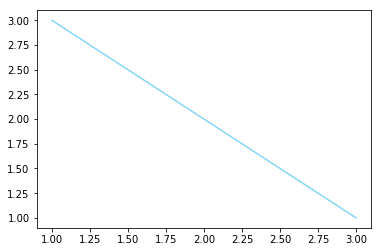

In [17]:
plt.plot(x,y,color = rand_color)

In [18]:
import random
rand_red = 23
rand_grn = 12
rand_blu = 173
rand_color = [rand_red, rand_grn, rand_blu]
print(rand_color)
for c in range(len(rand_color)):
    rand_color[c] = hex(rand_color[c])
print(rand_color)
for c in range(len(rand_color)):
    rand_color[c] = rand_color[c][2:]
print(rand_color)
rand_color = '#'+rand_color[0]+rand_color[1]+rand_color[2]
print(rand_color)

[23, 12, 173]
['0x17', '0xc', '0xad']
['17', 'c', 'ad']
#17cad


In [19]:
plt.plot(x,y,color = rand_color)

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7f07dfa2cae8> (for post_execute):


ValueError: Invalid RGBA argument: '#17cad'

ValueError: Invalid RGBA argument: '#17cad'

<Figure size 432x288 with 1 Axes>

inside the plot function when i do color = ''. If i'm putting a hex color, it is expecting a 6 digit number. So I need to check if the hex code for one of the primary colors is one digit, and if it is, I'll just add a zero in front of it. 

In [20]:
import random
rand_red = 23
rand_grn = 12
rand_blu = 173
rand_color = [rand_red, rand_grn, rand_blu]
print(rand_color)
for c in range(len(rand_color)):
    rand_color[c] = hex(rand_color[c])
print(rand_color)
for c in range(len(rand_color)):
    rand_color[c] = rand_color[c][2:]
    if len(rand_color[c]) < 2:
           rand_color[c] = '0'+rand_color[c]
print(rand_color)
rand_color = '#'+rand_color[0]+rand_color[1]+rand_color[2]
print(rand_color)

[23, 12, 173]
['0x17', '0xc', '0xad']
['17', '0c', 'ad']
#170cad


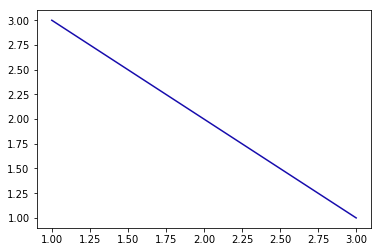

In [21]:
plt.plot(x,y,color = rand_color)

In [22]:
import random
def rand_hex_color():
    rand_red = random.randint(0,255)
    rand_grn = random.randint(0,255)
    rand_blu = random.randint(0,255)
    rand_color = [rand_red, rand_grn, rand_blu]
    for c in range(len(rand_color)):
        rand_color[c] = hex(rand_color[c])
    for c in range(len(rand_color)):
        rand_color[c] = rand_color[c][2:]
        if len(rand_color[c]) < 2:
            rand_color[c] = '0'+rand_color[c]
    rand_color = '#'+rand_color[0]+rand_color[1]+rand_color[2]
    return rand_color

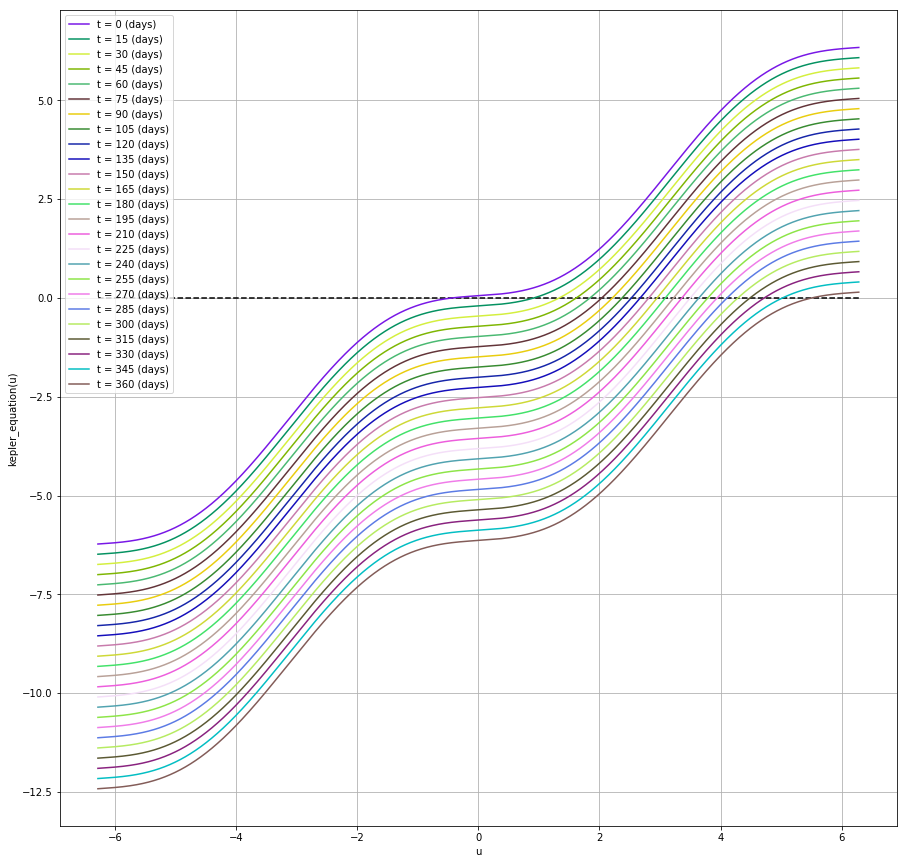

In [23]:
us = np.arange(-2*np.pi,2*np.pi, 0.001) #Range of 'u' that I want to plot over
plt.figure(figsize = (15,15))
plt.grid(which='major', axis='both') #Add grid lines
times = np.arange(0,365,15) #List of times I want to plot keplers equation for
for t in times:
    rand_color = rand_hex_color()
    plt.plot(us, kepler_equation(us,t,0.9),color = rand_color, label = 't = {} (days)'.format(t))
plt.legend()
plt.xlabel('u')
plt.ylabel('kepler_equation(u)')
plt.hlines(0,-2*np.pi, 2*np.pi, linestyles='dashed')
plt.show()

Now there is a possibility that the same random number gets picked twice, but the odds of that happening are very very slim, so I'm just going to assume that it never happens. 

If I where to make any imporvments I would make it so that the starting color is random, and then each next color is similar-ish to it. The compleatly random colors can make it hard to look at sometimes and it would be nicer if there were more gradual complimentary colors that didn't repeat. 